In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

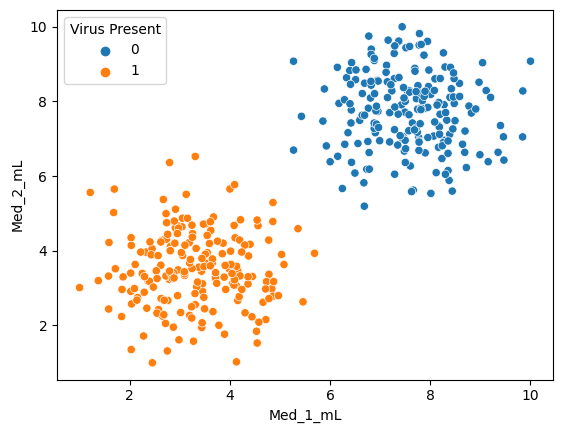

In [7]:
#   visulaizing the distribution
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present')

# this is nicely distributed . There are two features & they are quite seperated

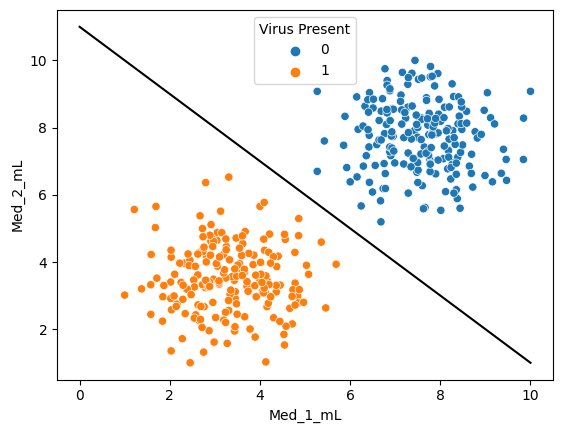

In [10]:
#  also plotting the hyper plane line
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present')

b=11
m=-1
x=np.linspace(0,10,100)
y=m*x+b
plt.plot(x,y,'black')

In [11]:
#  using Support Vector Machine
from sklearn.svm import SVC 

In [12]:
help(SVC)   # support vector classifier

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [34]:
# here we are not doing train-test split , scaling . Just understanding how it works

In [35]:
X=df.drop('Virus Present',axis=1)

In [36]:
y=df['Virus Present']

In [37]:
model=SVC(kernel='linear',C=1000)

In [38]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [39]:
from svm_margin_plot import plot_svm_boundary

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


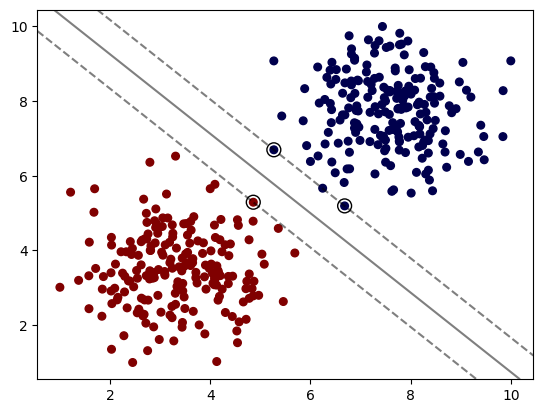

In [40]:
plot_svm_boundary(model,X,y)

In [48]:
#  C -> refers to how many of support vector points you are allowing inside margin
#   Here  no. of points is inversely proportional to C . This C is inversely to C in slides
#  lower the C , more you are considering the support vector points -> i.e making the margin softer

In [46]:
model=SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


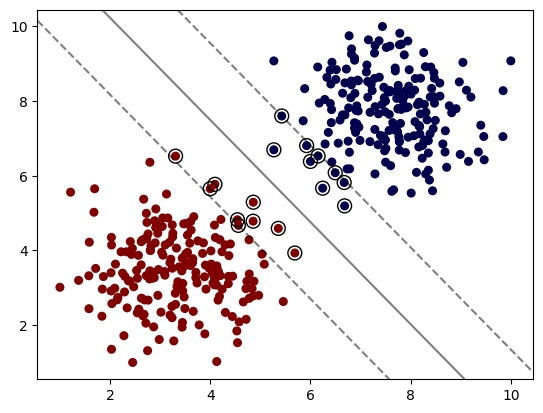

In [47]:
plot_svm_boundary(model,X,y)

In [49]:
#  we can perform some sort of validation & grid search to find optimal value of C

# C is inversely proportional to margin ( soft margin)
 C which adds a penalty for each misclassified data point.
 If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


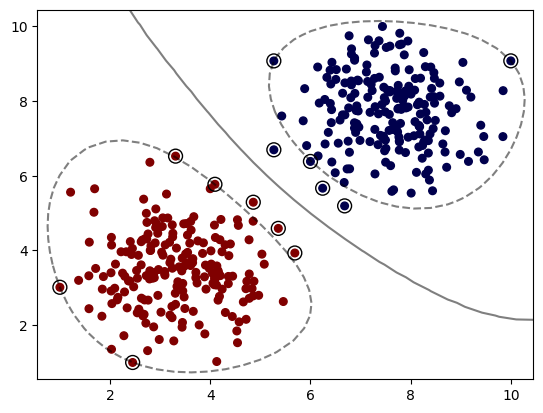

In [52]:
model=SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [53]:
#  understandin Gamma parameter 
# Gamma -> defines how much influence a single training example has. We can take more noise from our svm model.
#  more the Gamma, define more & more influence per support vector , we get margin really fitting to all support vectors 

# Gamma   -> works for non-linear kernel
Low values of gamma indicate a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


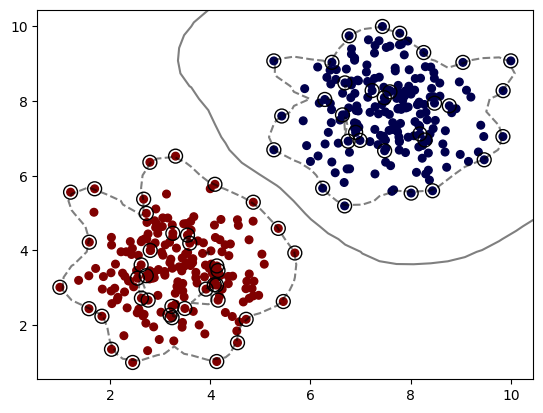

In [56]:
model=SVC(kernel='rbf', C=1,gamma=0.9)  # larger gamma -> more margin
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


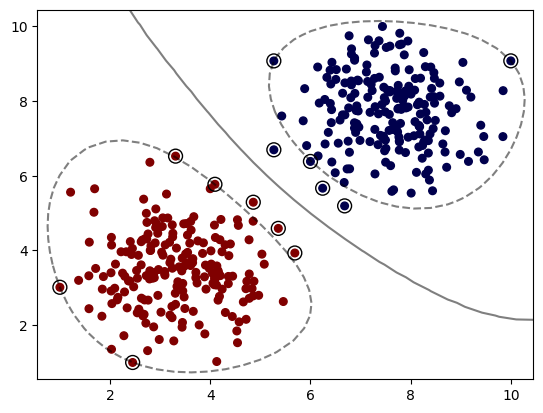

In [59]:
# choose gamma as 'scale' to have balance
model=SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

 # sigmoid kernel ->  all the points being highlighted as support vectors  

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


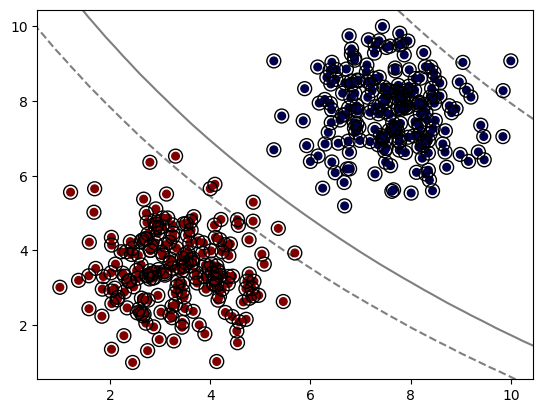

In [60]:
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

# polynomial kernel

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


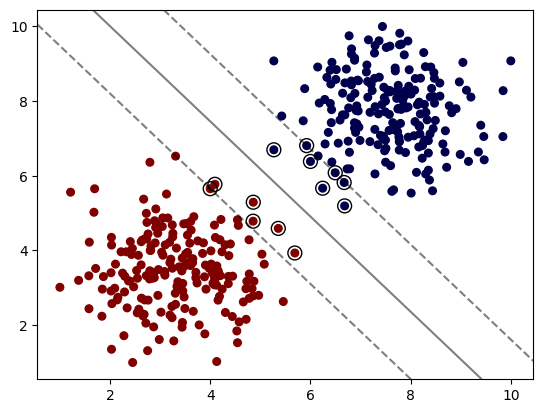

In [61]:
model=SVC(kernel='poly',degree=1)  # looking like linear kernel
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


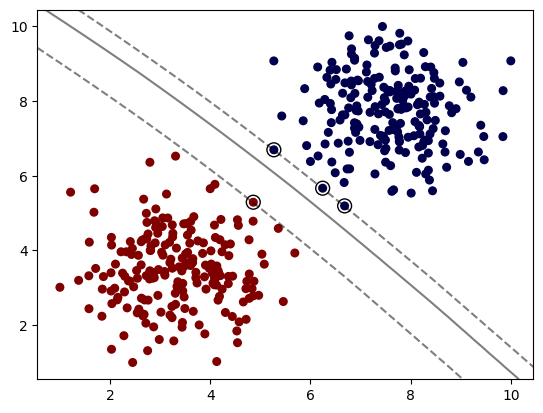

In [64]:
model=SVC(kernel='poly',degree=10)
model.fit(X,y)
plot_svm_boundary(model,X,y)

# finding optimal parameter's value using GridSearchCV(Full cross-Validation)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
svm=SVC()
param_grid={'kernel':['linear','rbf'],'C':[0.01,0.1,1]}

In [67]:
grid=GridSearchCV(svm,param_grid)

In [68]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [69]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}